In [1]:
%pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 8.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 19.9 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

ds = load_dataset("martingrzzler/mnemonics_benchmark")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/martingrzzler___json/martingrzzler--mnemonics_benchmark-6cc75b71b93e3c15/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['kanji_id', 'component_meanings', 'wanikani_mnemonic', 'kanji_meaning', 'gpt2xl_mnemonic', 'gpt3_paragraph', 'gpt3_mnemonic'],
        num_rows: 190
    })
})

In [112]:
import random
import re

# get 5 radom samples
idx = random.sample(range(len(ds['train'])), 1)


for i in range(len(idx)):
    sample = ds['train'][idx[i]]
    print(f"Words: {sample['component_meanings']},{sample['kanji_meaning']}")
    print(f"Mnemonic: {re.sub('<.*?>', '', sample['gpt2xl_mnemonic'])}")

Words: turkey,boil,char
Mnemonic: This is a rush transcript. Copy may not be in its final form turkey charlie boilley: I want to thank you all very much for being here today, and especially the people who have been with me on this journey over these last few months as we've made our way through what has become one of my most important life experiences so far


In [5]:
%pip install openai -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 KB 2.5 MB/s eta 0:00:00


In [6]:
import openai

In [119]:
character_message = {
    "role": "system",
    "content": """
You are a human rating mnemonics based on how memorable they are on a integer scale from 1 to 10.
"""
}

# Examples:

# Words: foot,kiss,road
# Mnemonic: If you’ve been walking all day, nobody is going to want to kiss your foot if you’ve been walking barefoot down a dirt road. Your feet are filthy, sweaty, and stinky. Nobody is going to want to kiss those feet. Imagine kissing someone’s foot. Now imagine kissing someone’s foot after they’ve been walking down a dirt road for hours. It’s disgusting. Smell the stench of dirt and sweat wafting up into your nostrils as the foot approaches your lips. It’s wretched.
# Score: 4

# Words: leader,dance,tree,greatness
# Mnemonic: This is a rush transcript. Copy may not be in its final form dance leader: The greatness of this tree has been known for centuries, but it was only recently that scientists were able to identify the species and learn more about what makes these trees so special... DANCE LEADER (voice-over):...and why they're
# Score: 1

def get_content(mnemonic, words):
    return f"""
Words: {','.join(words)}
Mnemonic: {mnemonic}    
Score: 
"""

def get_user_message(example, key):
    words = example['component_meanings'].split(',') + [example['kanji_meaning']]
    msg = get_content( re.sub('<.*?>', '', example[key]), words)
    return {
        "role": "user",
        "content": msg
    }




In [114]:
get_user_message(ds['train'][idx[0]], 'gpt2xl_mnemonic')['content']

"\nWords: turkey,boil,char\nMnemonic: This is a rush transcript. Copy may not be in its final form turkey charlie boilley: I want to thank you all very much for being here today, and especially the people who have been with me on this journey over these last few months as we've made our way through what has become one of my most important life experiences so far    \nScore: \n"

In [115]:
# list models
res = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=[character_message, get_user_message(ds['train'][idx[0]], 'gpt2xl_mnemonic')],
)

In [120]:
res

<OpenAIObject chat.completion id=chatcmpl-71XPixV3ySWKfoBySa73ysJmSD1D6 at 0x7f65f065da90> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "3. The mnemonic doesn't appear to be very coherent or relevant to any specific information, which could make it difficult to remember. Additionally, the content of the mnemonic appears to be unrelated to the words \"turkey,\" \"boil,\" and \"char,\" which also makes it less memorable.",
        "role": "assistant"
      }
    }
  ],
  "created": 1680601126,
  "id": "chatcmpl-71XPixV3ySWKfoBySa73ysJmSD1D6",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 59,
    "prompt_tokens": 124,
    "total_tokens": 183
  }
}

In [121]:
int(res['choices'][0]['message']['content'][0])

3

In [124]:
import time

def map_rating(example):
    keys = ['gpt2xl_mnemonic', 'gpt3_mnemonic', 'gpt3_paragraph', 'wanikani_mnemonic']
    for key in keys:
        res = openai.ChatCompletion.create(
            model='gpt-3.5-turbo-0301',
            messages=[character_message, get_user_message(example, key)],
        )
        try:
            example[key + '_rating'] = float(res['choices'][0]['message']['content'][0])
        except:
            example[key + '_rating'] = None
    # to not overload the API
    time.sleep(1)
    return example


In [69]:
ds_ratings = ds.map(map_rating)

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [70]:
ds_ratings

DatasetDict({
    train: Dataset({
        features: ['kanji_id', 'component_meanings', 'wanikani_mnemonic', 'kanji_meaning', 'gpt2xl_mnemonic', 'gpt3_paragraph', 'gpt3_mnemonic', 'gpt2xl_mnemonic_rating', 'gpt3_mnemonic_rating', 'gpt3_paragraph_rating', 'wanikani_mnemonic_rating'],
        num_rows: 190
    })
})

In [72]:
ds_ratings['train'].to_json('mnemonics_benchmark_ratings.jsonl', orient='records', lines=True)

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

295614

In [76]:
from scipy.stats import f_oneway
def anova(ds):
    f, p = f_oneway(ds['gpt3_paragraph_rating'], ds['gpt3_mnemonic_rating'], ds['wanikani_mnemonic_rating'], ds['gpt2xl_mnemonic_rating'])
    return p

In [79]:
# count rows with ratings == None for the entire dataset

def filter_not_none(example):
    keys = ['gpt2xl_mnemonic_rating', 'gpt3_mnemonic_rating', 'gpt3_paragraph_rating', 'wanikani_mnemonic_rating']
    discard = False

    for key in keys:
        if example[key] is None:
            discard = True
            break
    
    return not discard

In [80]:
ds_ratings = ds_ratings.filter(filter_not_none)

Filter:   0%|          | 0/190 [00:00<?, ? examples/s]

In [82]:
ds_ratings

DatasetDict({
    train: Dataset({
        features: ['kanji_id', 'component_meanings', 'wanikani_mnemonic', 'kanji_meaning', 'gpt2xl_mnemonic', 'gpt3_paragraph', 'gpt3_mnemonic', 'gpt2xl_mnemonic_rating', 'gpt3_mnemonic_rating', 'gpt3_paragraph_rating', 'wanikani_mnemonic_rating'],
        num_rows: 116
    })
})

In [83]:
anova(ds_ratings['train'])

1.2485742270894437e-41

In [86]:
import matplotlib.pyplot as plt

def box_plot(df, title):
    fig, ax = plt.subplots(1,1)
    ax.boxplot([df['gpt3_paragraph_rating'], df['gpt3_mnemonic_rating'], df['wanikani_mnemonic_rating'], df['gpt2xl_mnemonic_rating']])
    ax.set_xticklabels(['GPT-3 Paragraph', 'GPT-3 Mnemonic', 'WaniKani', 'GPT-2XL'])
    ax.set_title(title)
    plt.show()

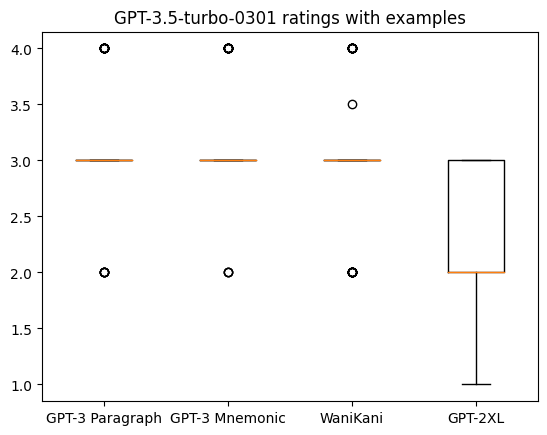

In [88]:
box_plot(ds_ratings['train'].to_pandas(), 'GPT-3.5-turbo-0301 ratings with examples')

In [125]:
ds_ratings_without_examples = ds.map(map_rating)

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [127]:
ds_ratings_without_examples['train'].to_json('mnemonics_benchmark_ratings_without_examples.jsonl', orient='records', lines=True)

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

295649

In [128]:
ds_ratings_without_examples = ds_ratings_without_examples.filter(filter_not_none)

Filter:   0%|          | 0/190 [00:00<?, ? examples/s]

In [129]:
ds_ratings_without_examples

DatasetDict({
    train: Dataset({
        features: ['kanji_id', 'component_meanings', 'wanikani_mnemonic', 'kanji_meaning', 'gpt2xl_mnemonic', 'gpt3_paragraph', 'gpt3_mnemonic', 'gpt2xl_mnemonic_rating', 'gpt3_mnemonic_rating', 'gpt3_paragraph_rating', 'wanikani_mnemonic_rating'],
        num_rows: 103
    })
})

In [130]:
anova(ds_ratings_without_examples['train'])

2.1143888882465692e-37

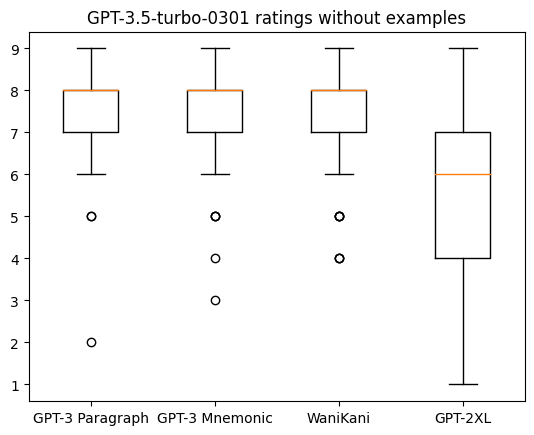

In [131]:
box_plot(ds_ratings_without_examples['train'], 'GPT-3.5-turbo-0301 ratings without examples')